<a href="https://colab.research.google.com/github/Vineet2107/HSO201_CourseProject/blob/main/IME692_coure_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import shap
import matplotlib.pyplot as plt

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
df=pd.read_csv('/content/drive/MyDrive/Course Project IME692/voweltrain_ .csv')
df1=pd.read_csv('/content/drive/MyDrive/Course Project IME692/voweltest_.csv')

In [65]:
df.head(15)

,row.names,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
0,1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
1,2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
2,3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
3,4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
4,5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396
5,6,6,-2.852,1.914,-0.755,0.825,-1.588,0.855,0.217,-0.246,0.238,-0.365
6,7,7,-3.482,2.524,-0.433,1.048,-1.995,0.902,0.322,0.450,0.377,-0.366
7,8,8,-3.941,2.305,0.124,1.771,-1.815,0.593,-0.435,0.992,0.575,-0.301
8,9,9,-3.860,2.116,-0.939,0.688,-0.675,1.679,-0.512,0.928,-0.167,-0.434
9,10,10,-3.648,1.812,-1.378,1.578,0.065,1.577,-0.466,0.702,0.060,-0.836


In [66]:
df.y=df.y-1
df1.y=df1.y-1

In [67]:
df

,row.names,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
0,1,0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
1,2,1,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
2,3,2,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
3,4,3,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
4,5,4,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396
...,...,...,...,...,...,...,...,...,...,...,...,...
523,524,6,-4.065,2.876,-0.856,-0.221,-0.533,0.232,0.855,0.633,-1.452,0.272
524,525,7,-4.513,4.265,-1.477,-1.090,0.215,0.829,0.342,0.693,-0.601,-0.056
525,526,8,-4.651,4.246,-0.823,-0.831,0.666,0.546,-0.300,0.094,-1.343,0.185
526,527,9,-5.034,4.993,-1.633,-0.285,0.398,0.181,-0.211,-0.508,-0.283,0.304


In [68]:
df.describe()

,row.names,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
count,528.00000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,264.50000,5.000000,-3.166695,1.735343,-0.448002,0.524983,-0.389280,0.584960,0.017477,0.417394,-0.268112,-0.084568
std,152.56474,3.165277,0.957965,1.160970,0.741363,0.769361,0.722011,0.648547,0.479254,0.595580,0.619584,0.560317
min,1.00000,0.000000,-5.211000,-1.274000,-2.487000,-1.409000,-2.127000,-0.836000,-1.537000,-1.293000,-1.613000,-1.680000
25%,132.75000,2.000000,-3.923000,0.916750,-0.945500,-0.083500,-0.930750,0.108500,-0.297000,-0.018250,-0.673750,-0.507000
50%,264.50000,5.000000,-3.097000,1.733000,-0.502500,0.456500,-0.417000,0.527500,0.040000,0.477000,-0.255000,-0.082500
75%,396.25000,8.000000,-2.511750,2.403750,0.049250,1.164000,0.115500,1.009750,0.348000,0.861250,0.137500,0.301000
max,528.00000,10.000000,-0.941000,5.074000,1.413000,2.191000,1.831000,2.327000,1.403000,1.673000,1.309000,1.396000


In [69]:
data_cov= df.cov()

In [70]:
data_corr=df.corr()

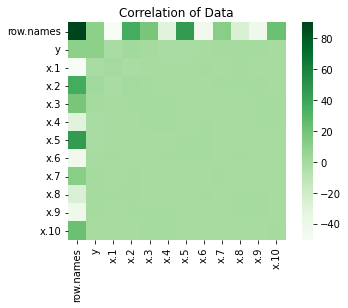

In [71]:
sns.heatmap(data_cov , vmax=90, square=True,cmap="Greens")
plt.title("Correlation of Data")
plt.show()

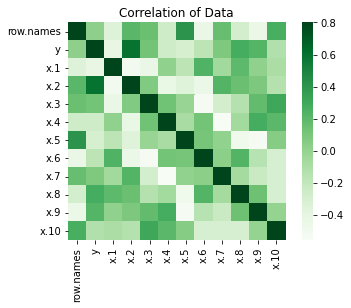

In [72]:
sns.heatmap(data_corr , vmax=.8, square=True, cmap="Greens")
plt.title("Correlation of Data")
plt.show()

In [73]:
from sklearn.utils.multiclass import type_of_target
y_logi=df.y
type_of_target(y_logi)

'multiclass'

In [74]:
y1_test=df1.y

In [75]:
y_train = tf.keras.utils.to_categorical(df.y)
y_test = tf.keras.utils.to_categorical(df1.y)

In [76]:
type_of_target(y_test)

'multilabel-indicator'

In [77]:
y_train.shape

(528, 11)

In [78]:
y_test.shape

(462, 11)

In [79]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [80]:
x=df[df.columns[2:12]]

In [81]:


x1=df1[df1.columns[2:12]]

In [82]:
x

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
1,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
2,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
3,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
4,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396
...,...,...,...,...,...,...,...,...,...,...
523,-4.065,2.876,-0.856,-0.221,-0.533,0.232,0.855,0.633,-1.452,0.272
524,-4.513,4.265,-1.477,-1.090,0.215,0.829,0.342,0.693,-0.601,-0.056
525,-4.651,4.246,-0.823,-0.831,0.666,0.546,-0.300,0.094,-1.343,0.185
526,-5.034,4.993,-1.633,-0.285,0.398,0.181,-0.211,-0.508,-0.283,0.304


In [83]:
x_train=np.array(x)
x_test=np.array(x1)

In [84]:
x_train.shape

(528, 10)

In [85]:
x_test.shape

(462, 10)

In [86]:
perms = np.random.permutation(528)

In [87]:
# x_train=x_train[perms]
# y_train=y_train[perms]
# y_logi=y_logi[perms]

In [88]:
x_train

array([[-3.639,  0.418, -0.67 , ...,  0.529, -0.874, -0.814],
       [-3.327,  0.496, -0.694, ...,  0.51 , -0.621, -0.488],
       [-2.12 ,  0.894, -1.576, ...,  0.676, -0.809, -0.049],
       ...,
       [-4.651,  4.246, -0.823, ...,  0.094, -1.343,  0.185],
       [-5.034,  4.993, -1.633, ..., -0.508, -0.283,  0.304],
       [-4.261,  1.827, -0.482, ...,  0.05 , -0.112,  0.321]])

In [89]:
X_train=x_train
X_test=x_test

In [90]:
#imported necessary packages for model
#import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [91]:
input_shape = [x_train.shape[1]]

In [92]:
#sequential MLP model 
model = tf.keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(10, activation='relu'),
    layers.Dropout(0.05),
    layers.BatchNormalization(),
    layers.Dense(20, activation='relu'),
    layers.Dropout(0.05),
    layers.Dense(15, activation='relu'),
    layers.Dropout(0.05),
    layers.BatchNormalization(),
    layers.Dense(11, activation = 'sigmoid'),
])


In [93]:
#compiling model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_6 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_7 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 20)                220       
                                                                 
 dropout_5 (Dropout)         (None, 20)               

Epoch 1/50
33/33 [==============================] - 4s 12ms/step - loss: 2.6573 - accuracy: 0.0928 - val_loss: 2.4098 - val_accuracy: 0.0628
Epoch 2/50
33/33 [==============================] - 0s 5ms/step - loss: 2.3897 - accuracy: 0.1383 - val_loss: 2.3522 - val_accuracy: 0.1234
Epoch 3/50
33/33 [==============================] - 0s 5ms/step - loss: 2.1528 - accuracy: 0.2367 - val_loss: 2.2729 - val_accuracy: 0.1797
Epoch 4/50
33/33 [==============================] - 0s 8ms/step - loss: 2.0708 - accuracy: 0.2670 - val_loss: 2.1708 - val_accuracy: 0.2251
Epoch 5/50
33/33 [==============================] - 0s 5ms/step - loss: 1.9500 - accuracy: 0.3409 - val_loss: 2.0647 - val_accuracy: 0.3074
Epoch 6/50
33/33 [==============================] - 0s 6ms/step - loss: 1.8211 - accuracy: 0.3674 - val_loss: 1.9682 - val_accuracy: 0.3636
Epoch 7/50
33/33 [==============================] - 0s 6ms/step - loss: 1.7468 - accuracy: 0.3826 - val_loss: 1.8795 - val_accuracy: 0.3766
Epoch 8/50
33/33 [=

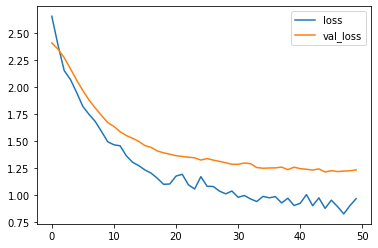

In [42]:
#training model
epochs = 50
history = model.fit(x_train, y_train,  batch_size=16,
                    epochs=epochs, verbose=1,
                    validation_data=(X_test, y_test)
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [43]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 3ms/step - loss: 1.2324 - accuracy: 0.5476


[1.2323757410049438, 0.5476190447807312]

In [44]:
e = shap.KernelExplainer(model, X_train)
shap_values = e.shap_values(X_test)

  0%|          | 0/462 [00:00<?, ?it/s]

In [47]:
shap.initjs()
# visualize the first prediction's explanation with a force plot
features = df1.columns[1:]
shap.force_plot(e.expected_value[0], shap_values[0][0], features = features)

Exception: ignored

In [42]:
import sklearn

In [43]:
#SVM classifier using using linear kernel 
from sklearn.svm import SVC  
model_svm = SVC(kernel='linear') 

#trained svm classifier
model_svm.fit(X_train, y_logi)

SVC(kernel='linear')

In [44]:
#Importing the necessary packages and libaries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np

In [45]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_logi)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_logi)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_logi)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_logi)

In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [53]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [54]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [58]:
train_accuracy[i] = knn5.score(X_train, y_train)
test_accuracy[i] = knn5.score(X_test, y_test)

NameError: ignored

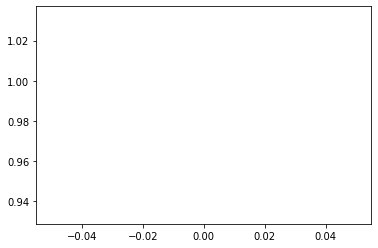

In [56]:
pd.Series(train_accuracy).plot()

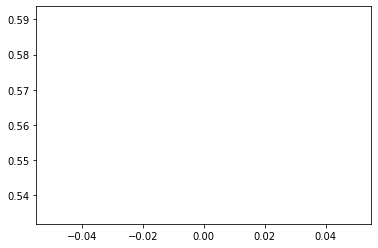

In [57]:
pd.Series(test_accuracy).plot()

In [49]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=5 56.27705627705628
Accuracy with k=1 56.27705627705628


In [ ]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_5)*100)

In [74]:
sklearn.metrics.multilabel_confusion_matrix(y_test, y_pred_5)

array([[[411,   9],
        [ 20,  22]],

       [[394,  26],
        [ 16,  26]],

       [[405,  15],
        [  7,  35]],

       [[415,   5],
        [ 17,  25]],

       [[404,  16],
        [ 24,  18]],

       [[380,  40],
        [ 16,  26]],

       [[406,  14],
        [ 22,  20]],

       [[412,   8],
        [  9,  33]],

       [[410,  10],
        [ 28,  14]],

       [[416,   4],
        [ 32,  10]],

       [[405,  15],
        [ 11,  31]]])

In [73]:
cm_df=pd.DataFrame(cm)

ValueError: ignored

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#X_train, X_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [95]:
import time

In [96]:
import numpy as np
from numpy import mean
import sklearn
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(fit_intercept=False,max_iter=1000)
start=time.time()
model.fit(x_train, y_logi)
end=time.time()
# # define the model evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=11)
# # evaluate the model and collect the scores
# n_scores = cross_val_score(model, x_train, y_logi, scoring='accuracy', )
# # report the model performance
# print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [97]:
end-start

0.05774235725402832

In [53]:
np.round(model.coef_, decimals=2)

array([[-1.  , -3.7 ,  1.02,  2.25,  0.57,  0.91,  1.65, -0.35, -0.12,
        -0.85],
       [-0.63, -1.99,  0.44,  0.34,  2.16,  1.8 , -1.02,  0.64, -0.72,
         0.81],
       [-0.53, -1.79, -2.48,  0.6 ,  1.4 , -0.92, -2.24, -0.24, -0.9 ,
         0.2 ],
       [ 0.33,  0.33, -3.09,  0.24, -1.05, -2.84, -1.04, -0.74, -0.89,
        -0.33],
       [ 1.04,  1.55,  0.05, -0.96, -2.83, -0.45,  0.34, -0.54, -0.32,
        -0.57],
       [ 0.17,  0.74, -0.05, -0.37, -1.57,  0.04,  0.36, -0.89, -0.31,
         0.52],
       [ 0.38,  1.21,  0.36, -0.88, -1.46, -1.42,  0.04,  0.78,  0.38,
        -0.14],
       [ 0.68,  1.88,  0.66, -0.69, -0.52, -0.96,  0.75,  1.04,  1.3 ,
         0.66],
       [ 0.17,  1.11,  1.26, -0.28,  1.02,  1.53,  0.56,  0.86,  0.72,
         0.38],
       [ 0.1 ,  1.33,  1.51,  0.53,  2.96,  1.68,  1.7 , -0.  ,  1.83,
         0.35],
       [-0.71, -0.66,  0.31, -0.77, -0.69,  0.63, -1.1 , -0.55, -0.96,
        -1.03]])

In [54]:
y_pred=model.predict(X_test)

In [60]:
model.evaluate(X_test, np.argmax(y_test,axis=-1))

AttributeError: ignored

In [56]:
sklearn.metrics.precision_recall_fscore_support(np.argmax(y_test,axis=-1), y_pred, average='weighted')

(0.31174066152308966, 0.3268398268398268, 0.31441847789887006, None)

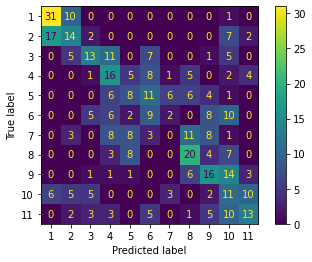

In [59]:
confusion_matrix = sklearn.metrics.confusion_matrix(np.argmax(y_test,axis=-1), y_pred)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1,2,3,4,5,6,7,8,9,10,11])
cm_display.plot()
plt.show()

Feature: 0, Score: -1.00085
Feature: 1, Score: -3.70325
Feature: 2, Score: 1.01873
Feature: 3, Score: 2.24761
Feature: 4, Score: 0.56554
Feature: 5, Score: 0.91364
Feature: 6, Score: 1.65130
Feature: 7, Score: -0.35418
Feature: 8, Score: -0.11816
Feature: 9, Score: -0.84788


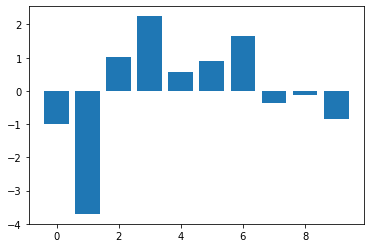

Feature: 0, Score: -0.63121
Feature: 1, Score: -1.99480
Feature: 2, Score: 0.43662
Feature: 3, Score: 0.33802
Feature: 4, Score: 2.15979
Feature: 5, Score: 1.79884
Feature: 6, Score: -1.02150
Feature: 7, Score: 0.64002
Feature: 8, Score: -0.72084
Feature: 9, Score: 0.80506


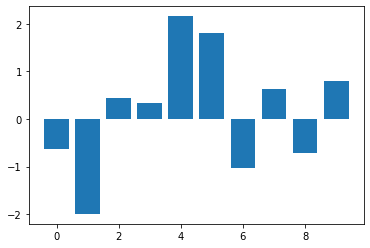

Feature: 0, Score: -0.53179
Feature: 1, Score: -1.79044
Feature: 2, Score: -2.48128
Feature: 3, Score: 0.60262
Feature: 4, Score: 1.39826
Feature: 5, Score: -0.92153
Feature: 6, Score: -2.23848
Feature: 7, Score: -0.24175
Feature: 8, Score: -0.90427
Feature: 9, Score: 0.20216


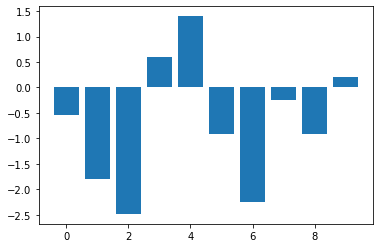

Feature: 0, Score: 0.32597
Feature: 1, Score: 0.33179
Feature: 2, Score: -3.08660
Feature: 3, Score: 0.23779
Feature: 4, Score: -1.05496
Feature: 5, Score: -2.83518
Feature: 6, Score: -1.04050
Feature: 7, Score: -0.73881
Feature: 8, Score: -0.89082
Feature: 9, Score: -0.32733


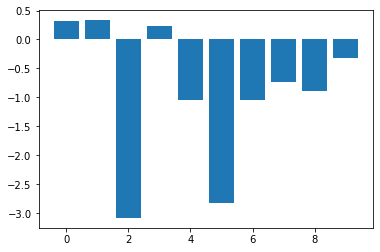

Feature: 0, Score: 1.03736
Feature: 1, Score: 1.54697
Feature: 2, Score: 0.05015
Feature: 3, Score: -0.96181
Feature: 4, Score: -2.82874
Feature: 5, Score: -0.45355
Feature: 6, Score: 0.34006
Feature: 7, Score: -0.54288
Feature: 8, Score: -0.32315
Feature: 9, Score: -0.57486


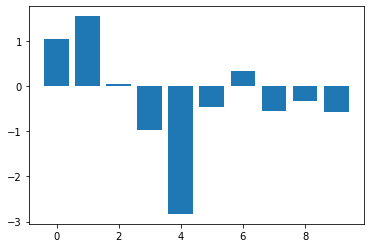

Feature: 0, Score: 0.16936
Feature: 1, Score: 0.73850
Feature: 2, Score: -0.04741
Feature: 3, Score: -0.37199
Feature: 4, Score: -1.56813
Feature: 5, Score: 0.04060
Feature: 6, Score: 0.36345
Feature: 7, Score: -0.88717
Feature: 8, Score: -0.31119
Feature: 9, Score: 0.51951


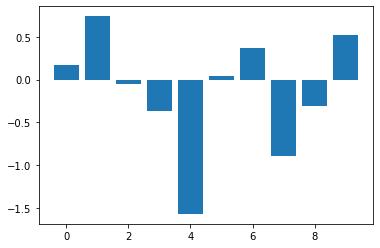

Feature: 0, Score: 0.38185
Feature: 1, Score: 1.21102
Feature: 2, Score: 0.36321
Feature: 3, Score: -0.88012
Feature: 4, Score: -1.45578
Feature: 5, Score: -1.42386
Feature: 6, Score: 0.04159
Feature: 7, Score: 0.78249
Feature: 8, Score: 0.37997
Feature: 9, Score: -0.14009


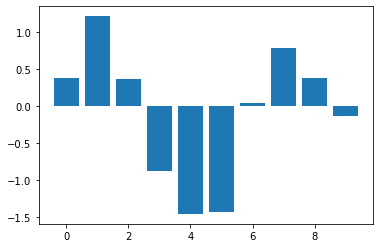

Feature: 0, Score: 0.67975
Feature: 1, Score: 1.87834
Feature: 2, Score: 0.66422
Feature: 3, Score: -0.68690
Feature: 4, Score: -0.51729
Feature: 5, Score: -0.96422
Feature: 6, Score: 0.75056
Feature: 7, Score: 1.03686
Feature: 8, Score: 1.29816
Feature: 9, Score: 0.66277


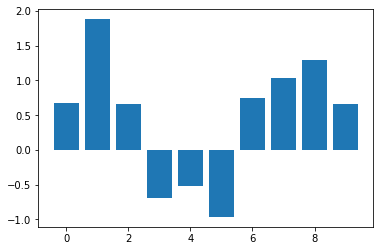

Feature: 0, Score: 0.17311
Feature: 1, Score: 1.11321
Feature: 2, Score: 1.26433
Feature: 3, Score: -0.27777
Feature: 4, Score: 1.02285
Feature: 5, Score: 1.53075
Feature: 6, Score: 0.55575
Feature: 7, Score: 0.85592
Feature: 8, Score: 0.72269
Feature: 9, Score: 0.37521


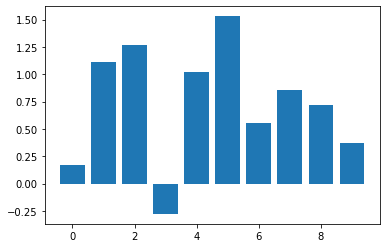

Feature: 0, Score: 0.10286
Feature: 1, Score: 1.33191
Feature: 2, Score: 1.50713
Feature: 3, Score: 0.52559
Feature: 4, Score: 2.96400
Feature: 5, Score: 1.68349
Feature: 6, Score: 1.69651
Feature: 7, Score: -0.00121
Feature: 8, Score: 1.82537
Feature: 9, Score: 0.35471


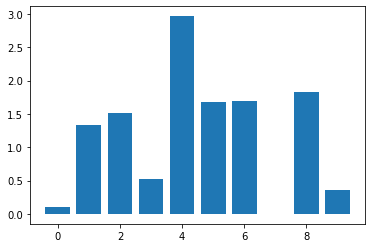

Feature: 0, Score: -0.70642
Feature: 1, Score: -0.66325
Feature: 2, Score: 0.31092
Feature: 3, Score: -0.77303
Feature: 4, Score: -0.68555
Feature: 5, Score: 0.63101
Feature: 6, Score: -1.09874
Feature: 7, Score: -0.54929
Feature: 8, Score: -0.95777
Feature: 9, Score: -1.02925


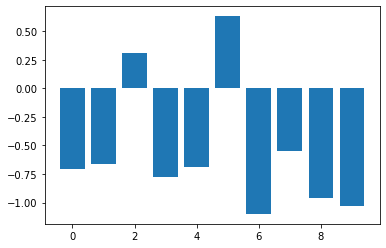

In [52]:
from matplotlib import pyplot
importance = model.coef_
for imp in importance:
  for i,v in enumerate(imp):
    #print(i,v)
    print('Feature: %0d, Score: %.5f' % (i,v))
  # plot feature importance
  pyplot.bar([x for x in range(len(imp))], imp)
  pyplot.show()

	


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
rf =  RandomForestClassifier(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [57]:
rf.oob_score_

0.8806818181818182

In [58]:
#hyperparameter tuning using GridSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [59]:
params = {
    'max_depth': [2,3,5,10,20, 30, 40, 50],
    'min_samples_leaf': [3,5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200,300, 400, 500, 600, 700, 800, 900, 1000]
}

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [62]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 784 candidates, totalling 3136 fits


KeyboardInterrupt: ignored

In [63]:
grid_search.best_score_

AttributeError: ignored

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[4], feature_names = x.columns,filled=True);

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = x.columns,class_names=['0','1','2','3','4','5','6','7','8','9','10'],filled=True);

In [ ]:
rf_best.feature_importances_

In [ ]:
imp_df = pd.DataFrame({
    "Varname": x.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

In [ ]:
importances = pd.Series(rf_best.feature_importances_,index=x.columns)
importances = importances.sort_values()

In [ ]:
importances.plot.barh()

In [ ]:
base_imp = imp_df(x_train.columns, rf.feature_importances_)
print(base_imp)

In [ ]:
svc = sklearn.svm.SVC(max_iter=3000)

svc.fit(X_train, y_train)

y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

accuracy_train_svc=round(accuracy_score(y_train,y_train_pred)* 100, 2)
accuracy_test_svc=round(accuracy_score(y_test,y_pred)* 100, 2)

In [ ]:
from sklearn import svm

def features_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features = df_train.columns[1:]
svm = svm.SVC(kernel = 'linear')
svm.fit(X_train, y_train)
features_importances(svm.coef_[0], features)